<a href="https://colab.research.google.com/github/manashpratim/Malaria-Cell-Classification/blob/master/Malaria_Cell_Images_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/87153/200743/cell_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561074569&Signature=UI5imb7qXlr%2BGbRPNr8LO4MkfRlfcxel%2FAi5febrnNW3RmHW4nnSi5Z6ZitGQSl%2BRUatV0gmrY1QIJeWQN2rfLilnX132Jk5OkGVm3Ci%2BvhKmFqtXgZekCxSc7XqfvnbUrwilEKdBDDneyWMeiTCJVBzQhErpLELXyjKyqYa46nNT0dnqjThR08YPctWyX3IjQzO%2BOx4O2evFc3F1QIm3IE4ti4RqnKZK2EXqfOZuNXOrxXVTzlFp0zwDESMSOHNzeNJmrG3%2BeQa6rclRrsBGlYoeahrVX8GMINmnAZnF%2BZGWGVbM%2FauUyCGRrqQ%2B1N5PdTW7siLy2Iiv2HsARd6zQ%3D%3D" \
       -O "/tmp/cell_images.zip"

--2019-06-17 23:54:17--  https://storage.googleapis.com/kaggle-datasets/87153/200743/cell_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561074569&Signature=UI5imb7qXlr%2BGbRPNr8LO4MkfRlfcxel%2FAi5febrnNW3RmHW4nnSi5Z6ZitGQSl%2BRUatV0gmrY1QIJeWQN2rfLilnX132Jk5OkGVm3Ci%2BvhKmFqtXgZekCxSc7XqfvnbUrwilEKdBDDneyWMeiTCJVBzQhErpLELXyjKyqYa46nNT0dnqjThR08YPctWyX3IjQzO%2BOx4O2evFc3F1QIm3IE4ti4RqnKZK2EXqfOZuNXOrxXVTzlFp0zwDESMSOHNzeNJmrG3%2BeQa6rclRrsBGlYoeahrVX8GMINmnAZnF%2BZGWGVbM%2FauUyCGRrqQ%2B1N5PdTW7siLy2Iiv2HsARd6zQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/tmp/cell_images.zip’

/tmp/cell_images.zi 100%[===================>] 337.08M   102MB/s    in 3.3s    

2019-06-17 23:54:21 (102 MB/s) - ‘/tmp/ce

In [0]:
import os
import zipfile

local_zip='/tmp/cell_images.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/cell_images')
zip_ref.close()

In [0]:
train_para=os.path.join('/tmp/cell_images/cell_images/Parasitized/')
train_uninf=os.path.join('/tmp/cell_images/cell_images/Uninfected/')
train_para_names=os.listdir(train_para)
train_uninf_names=os.listdir(train_uninf)
print(train_para_names[:5])
print(train_uninf_names[:5])

['C97P58ThinF_IMG_20150917_151903_cell_2.png', 'C133P94ThinF_IMG_20151004_155518_cell_107.png', 'C133P94ThinF_IMG_20151004_155518_cell_116.png', 'C132P93ThinF_IMG_20151004_151941_cell_41.png', 'C180P141NThinF_IMG_20151201_165453_cell_30.png']
['C203ThinF_IMG_20151029_102123_cell_111.png', 'C12NThinF_IMG_20150614_124212_cell_200.png', 'C120P81ThinF_IMG_20151002_130715_cell_128.png', 'C216ThinF_IMG_20151106_135228_cell_83.png', 'C173P134NThinF_IMG_20151130_115733_cell_55.png']


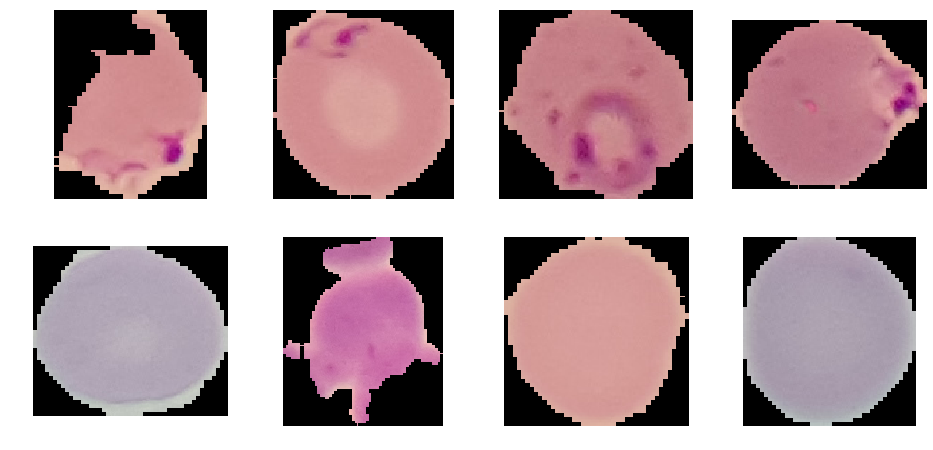

In [0]:
#Displaying the images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 4X4 configuration. The 1st row corresponds to images of parasitized cells. 2nd row corresponds to images of uninfected cells. 

nrows=4
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=4

next_para_pix = [os.path.join(train_para,fname) for fname in train_para_names[pic_index-4:pic_index]]
next_uninf_pix = [os.path.join(train_uninf,fname) for fname in train_uninf_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_para_pix+next_uninf_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [0]:
# Making directories using Python
cells=['Parasitized', 'Uninfected']

try:
    os.makedirs('/tmp/malaria/training/')
    os.makedirs('/tmp/malaria/testing/')
    for cell in cells:
      os.mkdir('/tmp/malaria/training/'+cell+'/')
      os.mkdir('/tmp/malaria/testing/'+cell+'/')
except OSError:
     pass

In [0]:
#Function for Splitting Data
def split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE):
  files=[]
  
  for filename in os.listdir(SOURCE):
    file=SOURCE+filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename + ' is zero length. So ignoring!')
      
  train_length =int(len(files)* SPLIT_SIZE)
  test_length =int(len(files)-train_length)
  
  import random
  suffled_set=random.sample(files,len(files))
  
  train_set=suffled_set[0:train_length]
  test_set=suffled_set[train_length:]
  
  from shutil import copyfile
  for filename in train_set:
    copyfile(SOURCE+filename,TRAINING+filename)
    
  for filename in test_set:
    copyfile(SOURCE+filename,TESTING+filename)
    

In [0]:
#Splitting Data
for cell in cells:
  SOURCE='/tmp/cell_images/cell_images/'+cell+'/'
  TRAINING='/tmp/malaria/training/'+cell+'/'
  TESTING='/tmp/malaria/testing/'+cell+'/'
  SPLIT_SIZE=0.9
  split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE)
  

In [0]:
for cell in cells:
  TRAINING='/tmp/malaria/training/'+cell+'/'
  TESTING='/tmp/malaria/testing/'+cell+'/'
  print('Total training '+ cell+' images:',len(os.listdir(TRAINING)))
  print('Total testing '+ cell+' images:',len(os.listdir(TESTING)))


Total training Parasitized images: 12402
Total testing Parasitized images: 1378
Total training Uninfected images: 12402
Total testing Uninfected images: 1378


In [0]:
import tensorflow as tf
from tensorflow import keras

In [23]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')"""
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator=train_datagen.flow_from_directory(
      '/tmp/malaria/training/',
      target_size=(150,150),
      batch_size=100,
      class_mode='binary'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      '/tmp/malaria/testing/',
      target_size=(150,150),
      batch_size=100,
      class_mode='binary'
)

Found 24802 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [0]:
#Building a ConvNet

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [32]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
  train_generator,
  epochs=10,
  validation_data=test_generator,
  verbose=1
)

Epoch 1/10
249/249 [==============================] - 50s 199ms/step - loss: 1.1769 - acc: 0.7221 - val_loss: 0.2483 - val_acc: 0.9220
Epoch 2/10
249/249 [==============================] - 47s 189ms/step - loss: 0.2489 - acc: 0.9200 - val_loss: 0.2173 - val_acc: 0.9372
Epoch 3/10
249/249 [==============================] - 47s 189ms/step - loss: 0.2361 - acc: 0.9352 - val_loss: 0.2147 - val_acc: 0.9383
Epoch 4/10
249/249 [==============================] - 47s 188ms/step - loss: 0.1913 - acc: 0.9409 - val_loss: 0.2064 - val_acc: 0.9445
Epoch 5/10
249/249 [==============================] - 47s 188ms/step - loss: 0.1834 - acc: 0.9446 - val_loss: 0.1842 - val_acc: 0.9496
Epoch 6/10
249/249 [==============================] - 47s 188ms/step - loss: 0.1640 - acc: 0.9502 - val_loss: 0.1843 - val_acc: 0.9532
Epoch 7/10
249/249 [==============================] - 47s 188ms/step - loss: 0.1594 - acc: 0.9507 - val_loss: 0.2598 - val_acc: 0.9347
Epoch 8/10
249/249 [==============================] - 4

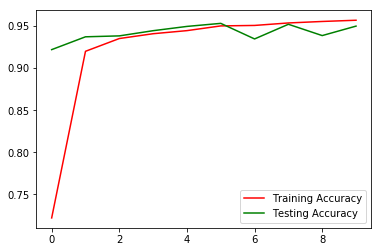

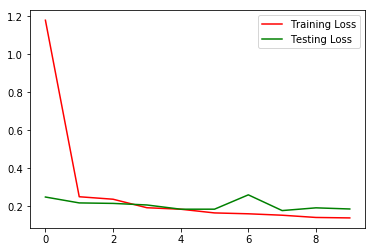

In [33]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [0]:
#Clean Up
import os,signal
os.kill(os.getpid(),signal.SIGKILL)